## Traveling Salesman Problem - TabuSearch

### Import Packages

In [1]:
from pyomo.environ import *
import pyomo.environ as pyo
import random
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from IPython.display import clear_output
import time
import copy

### Inputs

In [2]:
#Generate Data Inputs

# Select random seed
random.seed(1)

# Number of cities
n=100

#Coordinate Range
rangelct=10000

#Generate random locations
coordlct_x = random.choices(range(0, rangelct), k=n)
coordlct_y = random.choices(range(0, rangelct), k=n)

#Compute distance between locations
distancelct=np.empty([n, n])
for i_index in range(n):
    for j_index in range(n):
        distancelct[i_index,j_index]=(math.sqrt(((coordlct_x[i_index]-coordlct_x[j_index])**2) +((coordlct_y[i_index]-coordlct_y[j_index])**2)))    

distancelct[np.diag_indices_from(distancelct)] = 99999

df = pd.DataFrame(distancelct)
df.index += 1
df.columns += 1
cij_model=df.stack().to_dict()


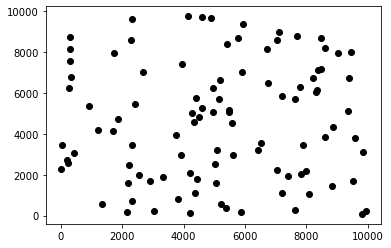

In [3]:
plt.plot(coordlct_x, coordlct_y, 'o', color='black');

### Generate Initial Solution Using Greedy Approach

In [4]:
random.seed(1)
Solution_i=random.sample(list(range(n)), n)

dfSolution_i=pd.DataFrame(Solution_i)
dfSolution_i
dflinkindex_p1=dfSolution_i
dflinkindex_p2=dfSolution_i.shift(-1)
dflinkindex_p2.loc[n-1]=dflinkindex_p1.loc[0]
linkindex_p1=dflinkindex_p1.to_numpy()
linkindex_p2=dflinkindex_p2.to_numpy()
linkindex_p1=linkindex_p1.astype(int)
linkindex_p2=linkindex_p2.astype(int)
linkindex_p1=linkindex_p1.transpose()[0]
linkindex_p2=linkindex_p2.transpose()[0]


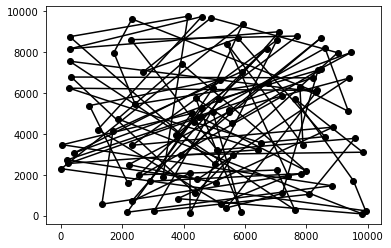

In [5]:
def connectpoints(x,y,p1,p2):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    plt.plot([x1,x2],[y1,y2],'k-')

for i_index in range(len(linkindex_p2)): 
    connectpoints(coordlct_x,coordlct_y,linkindex_p1[i_index],linkindex_p2[i_index])
    
plt.plot(coordlct_x, coordlct_y, 'o', color='black');

In [6]:
#Compute Objective Value
ObjValue=sum(distancelct[linkindex_p1,linkindex_p2])
ObjValue

508089.55416686134

### Tabu Search Algorithm

In [7]:
random.seed(3)
iteration=0
Objvalue_fulllist=ObjValue
program_starts = time.time()
cputime_i=[0,0] 
TabuList=[]
TabuSize=30

while cputime_i[-1]<150:
    
    Objvalue_list=9999999999999999 #auxiliary variable, needs to be a large number
    Solution_it=copy.deepcopy(Solution_i)
    idx = range(len(Solution_it))
    for i_index in range(len(TabuList)):
        idx=[i for i in idx if i != TabuList[i_index]]
    i1=random.sample(idx, 1)
    dist=distancelct[i1,]
    dist=dist[0]
    
    #Select Size of the Neighborooh
    if cputime_i[-1]<3000:
        quartile = int(0.99 * (len(dist)- 1))
    else:
        quartile = int(0.99 * (len(dist)- 1))
        
    maxdist=dist[np.argpartition(dist, quartile)[quartile]]
    i2_list=np.where(dist<maxdist)[0]
    random.shuffle(i2_list)
    
    #Best descent - for loop across all possible moves
    for i_index in range(len(i2_list)):
        
        #Insert Operator
        remove_index=np.where(np.array(Solution_it)==i1)
        Solution_it.pop(int(remove_index[0]))
        i2=i2_list[i_index]
        Solution_it.insert(i2, i1[0])
    
        #Solution Processing
        dfSolution_i=pd.DataFrame(Solution_it)
        dfSolution_i
        dflinkindex_p1=dfSolution_i
        dflinkindex_p2=dfSolution_i.shift(-1)
        dflinkindex_p2.loc[n-1]=dflinkindex_p1.loc[0]
        linkindex_p1=dflinkindex_p1.to_numpy()
        linkindex_p2=dflinkindex_p2.to_numpy()
        linkindex_p1=linkindex_p1.astype(int)
        linkindex_p2=linkindex_p2.astype(int)
        linkindex_p1=linkindex_p1.transpose()[0]
        linkindex_p2=linkindex_p2.transpose()[0]

        #Compute Objective Value
        ObjValue=sum(distancelct[linkindex_p1,linkindex_p2])
        Objvalue_list=np.append(Objvalue_list, ObjValue)
        
        #Select best move from the best descent
        if ObjValue==np.min(Objvalue_list):
            Solution_i=copy.deepcopy(Solution_it)
    
    print(np.min(Objvalue_list))
    
    Objvalue_fulllist=np.append(Objvalue_fulllist, min(Objvalue_list))
    iteration=iteration+1
    now = time.time()
    cputime_i=np.append(cputime_i, now-program_starts)
    
    #Update Tabu List
    if len(TabuList)<TabuSize:
        TabuList=np.append(TabuList, i1)
    else:
        TabuList=np.delete(TabuList, (0))
        TabuList=np.append(TabuList, i1)
        


499176.4176445247
498207.928149228
498207.928149228
485831.5750366094
477814.74536976044
471432.7363003234
463992.8667201495
460265.87795755826
450500.1323270881
448666.6734453437
446480.66299974907
446478.9487401027
445386.18173118983
438331.78179074754
431512.6602126516
422648.71542766265
416518.0366358859
416379.52953062276
415958.74617855874
415073.83739973087
409590.15774264815
409492.8300515874
406861.1941594796
402664.7114533168
392328.12428684445
391825.8045942228
388893.66882653657
384445.4771180949
379286.87529392523
376593.07822832145
376520.3537335899
374781.6340689591
374781.6340689591
374781.6340689591
374738.74537975766
373224.9862320872
371832.0757666928
367122.4875839006
362832.79210222414
362718.38234100194
356066.92703664355
354208.08453372197
353844.0706924918
353844.0706924918
350933.33585241745
346571.6764541989
344621.8932040155
344621.8932040155
342401.5384214432
342200.8252073654
340062.39051910595
337057.34182929393
336568.2432075955
334141.0639610285
330667.2

116043.32589294107
116043.32589294107
115980.73902534964
113981.495806766
113981.495806766
113981.495806766
113600.06804779732
113600.06804779732
113600.06804779732
114647.41057131601
114647.41057131601
114318.14553047209
114318.14553047209
114318.14553047209
114318.14553047209
114318.14553047209
111064.00624498301
109850.58725362926
109850.58725362926
109850.58725362926
109850.58725362926
109850.58725362926
109846.66766274822
109846.66766274822
109846.66766274822
109844.70582743044
109844.70582743044
109844.70582743044
109844.70582743044
109844.70582743044
109844.70582743044
108459.43747549565
108459.43747549565
108329.99970636568
108082.17096093728
108082.17096093728
108082.17096093728
108082.17096093728
108082.17096093728
108082.17096093728
108082.17096093728
108082.17096093728
107525.38960854827
107525.38960854827
107525.38960854827
107525.38960854827
107525.38960854827
107025.55065856523
107025.55065856523
107025.55065856523
107025.55065856523
107025.55065856523
106632.37362233405

103368.80777785357
103368.80777785357
103368.80777785357
103368.80777785357
103368.80777785357
103368.80777785357
103368.80777785357
103368.80777785357
103368.80777785357
103368.80777785357
103368.80777785357
103368.80777785357
103368.80777785357
103368.80777785357
103368.80777785357
103368.80777785357
103368.80777785357
103368.80777785357
103368.80777785357
103368.80777785357
103368.80777785357
103368.80777785357
103368.80777785357
103368.80777785357
103368.80777785357
103368.80777785357
103368.80777785357
103368.80777785357
103368.80777785357
103368.80777785357
103368.80777785357
103368.80777785357
104358.43216118902
104358.43216118902
104358.43216118902
104358.43216118902
104358.43216118902
104358.43216118902
104358.43216118902
104358.43216118902
104358.43216118902
104358.43216118902
104358.43216118902
104358.43216118902
104358.43216118902
104358.43216118902
104358.43216118902
104358.43216118902
104358.43216118902
104358.43216118902
104358.43216118902
104358.43216118902
104358.43216

104846.96295019747
104846.96295019747
104846.96295019747
104846.96295019747
104846.96295019747
104846.96295019747
104846.96295019747
104846.96295019747
104846.96295019747
104846.96295019747
104846.96295019747
104846.96295019747
104846.96295019747
104846.96295019747
104846.96295019747
104880.06208106632
104880.06208106632
104880.06208106632
104880.06208106632
104880.06208106632
104880.06208106632
104880.06208106632
104880.06208106632
104880.06208106632
104880.06208106632
104880.06208106632
104880.06208106632
104880.06208106632
104880.06208106632
104880.06208106632
104880.06208106632
104880.06208106632
104880.06208106632
104880.06208106632
104880.06208106632
104880.06208106632
104880.06208106632
104880.06208106632
104880.06208106632
104880.06208106632
104880.06208106632
104880.06208106632
104880.06208106632
104880.06208106632
104880.06208106632
104880.06208106632
104880.06208106632
104880.06208106632
104880.06208106632
104880.06208106632
104880.06208106632
104880.06208106632
104880.06208

102452.93854004201
102452.93854004201
102452.93854004201
102452.93854004201
102452.93854004201
102452.93854004201
102452.93854004201
102452.93854004201
102452.93854004201
102452.93854004201
102452.93854004201
102452.93854004201
102452.93854004201
102452.93854004201
102452.93854004201
102452.93854004201
102452.93854004201
102452.93854004201
102452.93854004201
102452.93854004201
102452.93854004201
102452.93854004201
102452.93854004201
102452.93854004201
102452.93854004201
102452.93854004201
102452.93854004201
102452.93854004201
102452.93854004201
102452.93854004201
102452.17011521485
102452.17011521485
102452.17011521485
102452.17011521485
102452.17011521485
102452.17011521485
102452.17011521485
102452.17011521485
102452.17011521485
102452.17011521485
102452.17011521485
102452.17011521485
102452.17011521485
102452.17011521485
102452.17011521485
102452.17011521485
102452.17011521485
102452.17011521485
102452.17011521485
102452.17011521485
102452.17011521485
102452.17011521485
102452.17011

102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688170427
102459.23688

96566.34618211788
96566.34618211788
96566.34618211788
96566.34618211788
96566.34618211788
96566.34618211788
96566.34618211788
96566.34618211788
96566.34618211788
96566.34618211788
96566.34618211788
96566.34618211788
96566.34618211788
96566.34618211788
96566.34618211788
96566.34618211788
96566.34618211788
96566.34618211788
96566.34618211788
96566.34618211788
96566.34618211788
96566.34618211788
96566.34618211788
96566.34618211788
96561.61282627998
96561.61282627998
96561.61282627998
96561.61282627998
96561.61282627998
96561.61282627998
96561.61282627998
96561.61282627998
96561.61282627998
96561.61282627998
96561.61282627998
96561.61282627998
96561.61282627998
96561.61282627998
96561.61282627998
96561.61282627998
96561.61282627998
96561.61282627998
96561.61282627998
96561.61282627998
96561.61282627998
96561.61282627998
96561.61282627998
96561.61282627998
96561.61282627998
96561.61282627998
96561.61282627998
96561.61282627998
96561.61282627998
96561.61282627998
96561.61282627998
96561.6128

### Results

In [8]:
np.min(Objvalue_fulllist)

96561.61282627998

### Plot results

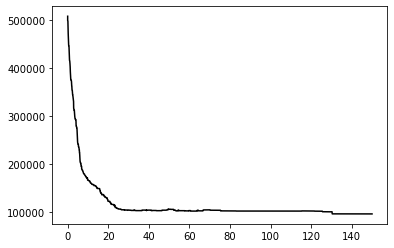

In [9]:
plt.plot(cputime_i[range(len(Objvalue_fulllist))],Objvalue_fulllist,'k-')

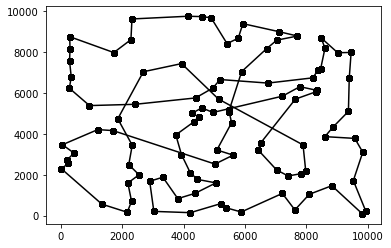

In [10]:
dfSolution_i=pd.DataFrame(Solution_i)

dflinkindex_p1=dfSolution_i
dflinkindex_p2=dfSolution_i.shift(-1)
dflinkindex_p2.loc[n-1]=dflinkindex_p1.loc[0]
linkindex_p1=dflinkindex_p1.to_numpy()
linkindex_p2=dflinkindex_p2.to_numpy()
linkindex_p1=linkindex_p1.astype(int)
linkindex_p2=linkindex_p2.astype(int)
linkindex_p1=linkindex_p1.transpose()[0]
linkindex_p2=linkindex_p2.transpose()[0]

def connectpoints(x,y,p1,p2):
        x1, x2 = x[p1], x[p2]
        y1, y2 = y[p1], y[p2]
        plt.plot([x1,x2],[y1,y2],'k-')

for i_index in range(len(linkindex_p2)): 
    connectpoints(coordlct_x,coordlct_y,linkindex_p1[i_index],linkindex_p2[i_index])

    plt.plot(coordlct_x, coordlct_y, 'o', color='black');
